In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
generi = pd.read_csv("generi.csv").dropna()
generi.head()

,MainGenere,Genere
0,electronic,acid house
1,jazz,acid jazz
2,electronic,acid techno
3,blues,acoustic blues
4,rock,acoustic rock


In [3]:
generi_graph = nx.Graph()
generi_graph.add_nodes_from(generi.Genere)
colours = {
    "ambient" : "#ccff33",
    "classical" : "#ccff99",
    "pop" : "#00ffff",
    "rock" : "#0066ff",
    "metal" : "#0000cc",
    "punk" : "#9900ff",
    "folk" : "#996633",
    "country" : "#ff9933",
    "latin" : "#ff0000",
    "dance" : "#ff0066",
    "electronic" : "#ffff00",
    "hip hop" : "#00cc99",
    "blues" : "#9966ff",
    "jazz" : "#ff66cc",
}
generi["colour"] = generi.MainGenere.map(lambda x: colours[x])
generi_graph.add_nodes_from(list(colours.keys()))

In [4]:
# connect the genere with its MainGenere
for index, row in generi.iterrows():
    generi_graph.add_edge(row.Genere, row.MainGenere)

In [5]:
## TODO:
# add number of tweets per genere (nodes size)
# check community that are linked toghether

/opt/anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


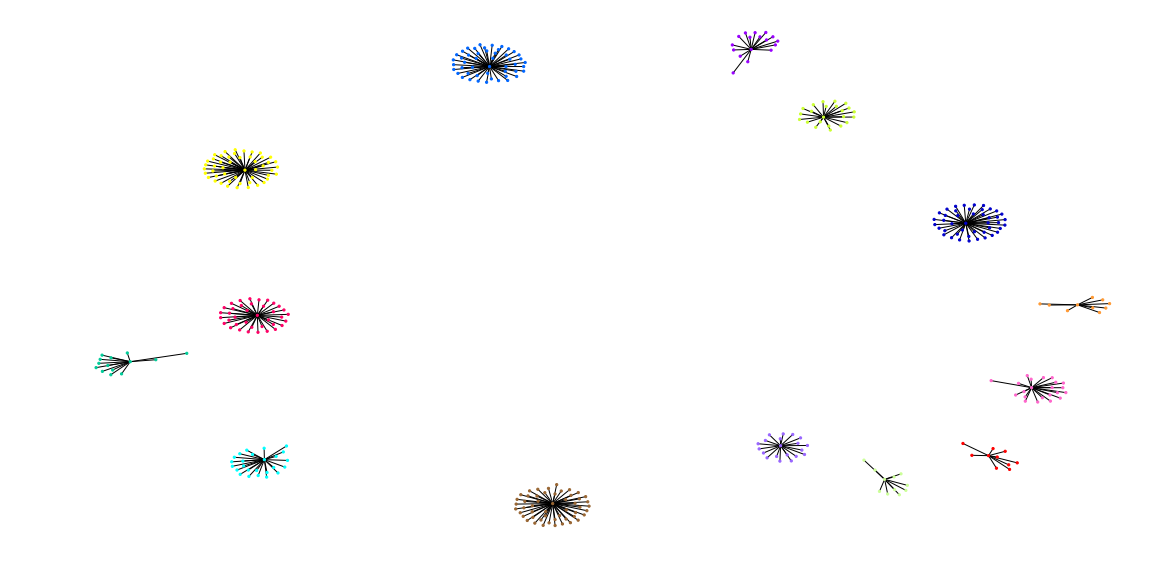

In [6]:
plt.figure(figsize=(20, 10))
plt.axis('off')
pos = nx.spring_layout(generi_graph)
nx.draw_networkx_nodes(generi_graph, pos,
                       node_color=generi.colour,
                       node_size=5)  # change with community size
# text of the genere
# nx.draw_networkx_labels(generi_graph, pos)
nx.draw_networkx_edges(generi_graph, pos,
                       arrows=True)
plt.show()

In [7]:
main_generi = pd.DataFrame([
    {"Genere" : k, "colour" : v} for k, v in colours.items()
])

main_generi_graph = nx.Graph()
main_generi_graph.add_nodes_from(main_generi.Genere)

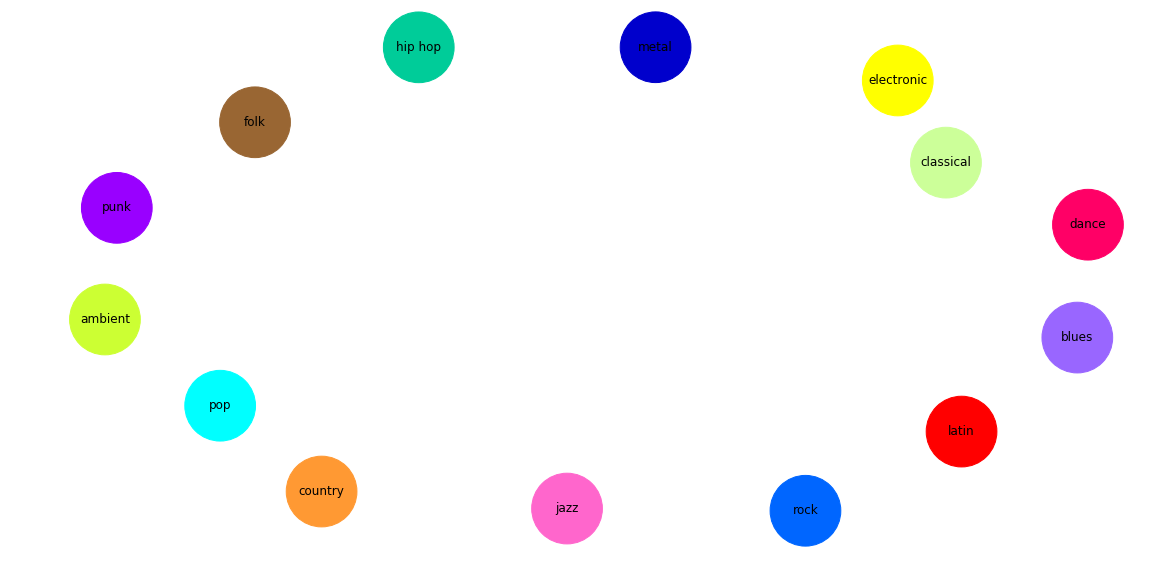

In [8]:
plt.figure(figsize=(20, 10))
plt.axis('off')
pos = nx.spring_layout(main_generi_graph)
nx.draw_networkx_nodes(main_generi_graph, pos,
                       node_color=main_generi.colour,
                       node_size=5000)  # change with community size
# text of the genere
nx.draw_networkx_labels(main_generi_graph, pos)
nx.draw_networkx_edges(main_generi_graph, pos,
                       arrows=True)
plt.show()